#Part1: Data Cleaning and Feature Engineering for the Bike Sharing Dataset

##Data Exploration: Summarize dataset statistics to understand the structure, features, and any missing values

In [75]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/diabetes+dataset.csv'
DiabetesDataset = pd.read_csv(file_path)

# Print the shape of the dataset
print("Dataset Shape:", DiabetesDataset.shape)

# Display data types of each column
print("\nData Types:")
print(DiabetesDataset.dtypes)

# Check for missing values in each column
print("\nMissing Values:")
print(DiabetesDataset.isnull().sum())

# Display summary statistics for numerical and categorical columns
print("\nSummary Statistics:")
print(DiabetesDataset.describe())


Dataset Shape: (70000, 34)

Data Types:
Target                           object
Genetic Markers                  object
Autoantibodies                   object
Family History                   object
Environmental Factors            object
Insulin Levels                    int64
Age                               int64
BMI                               int64
Physical Activity                object
Dietary Habits                   object
Blood Pressure                    int64
Cholesterol Levels                int64
Waist Circumference               int64
Blood Glucose Levels              int64
Ethnicity                        object
Socioeconomic Factors            object
Smoking Status                   object
Alcohol Consumption              object
Glucose Tolerance Test           object
History of PCOS                  object
Previous Gestational Diabetes    object
Pregnancy History                object
Weight Gain During Pregnancy      int64
Pancreatic Health                 int64


##Data Visualization:

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


###Correlation matrix

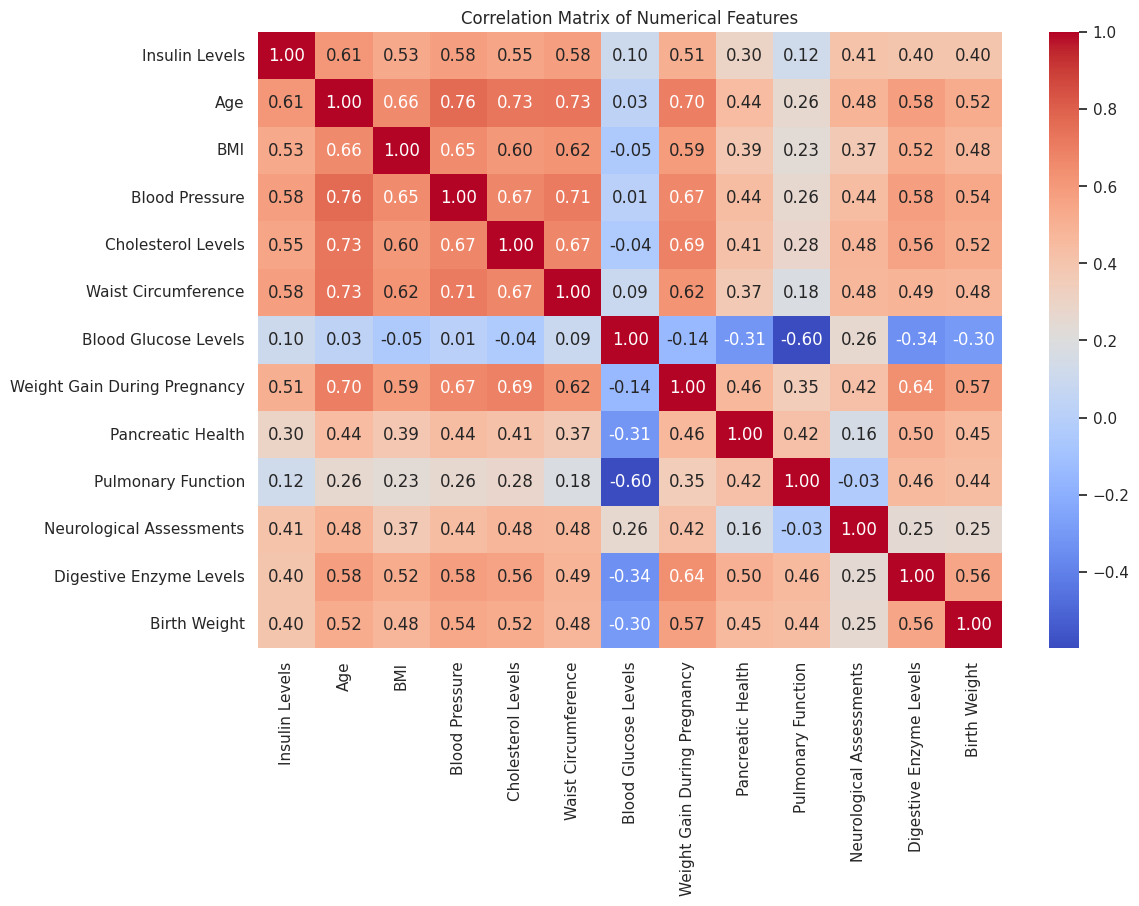

In [110]:
numerical_columns = DiabetesDataset.select_dtypes(include=['int64']).columns

# Visualize correlations among numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = DiabetesDataset[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


###Histogram of Each Feature

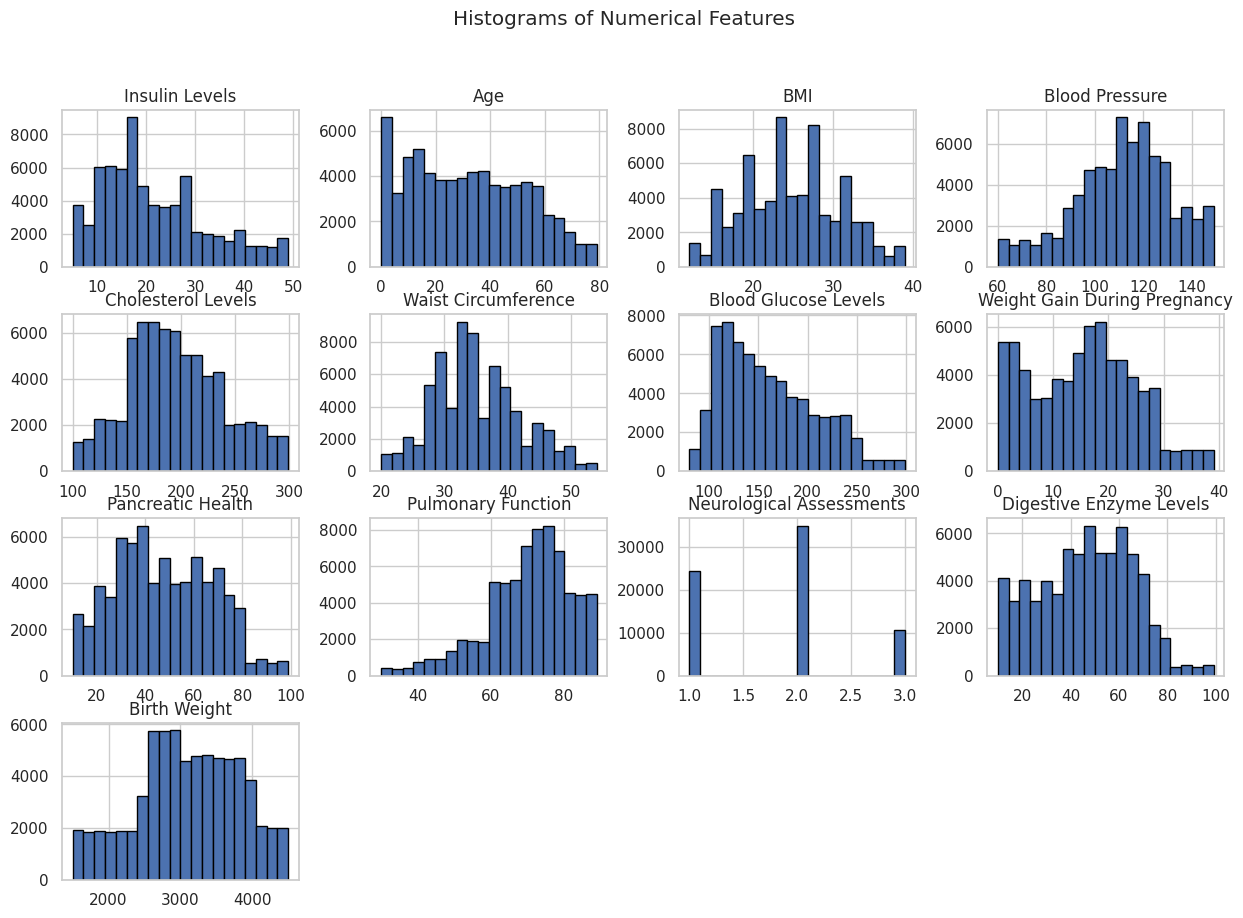

In [111]:

# Visualize distributions of numerical features
DiabetesDataset[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


<ipython-input-112-1752972cdaac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=DiabetesDataset, x='Target', y='Cholesterol Levels', palette="Set3")


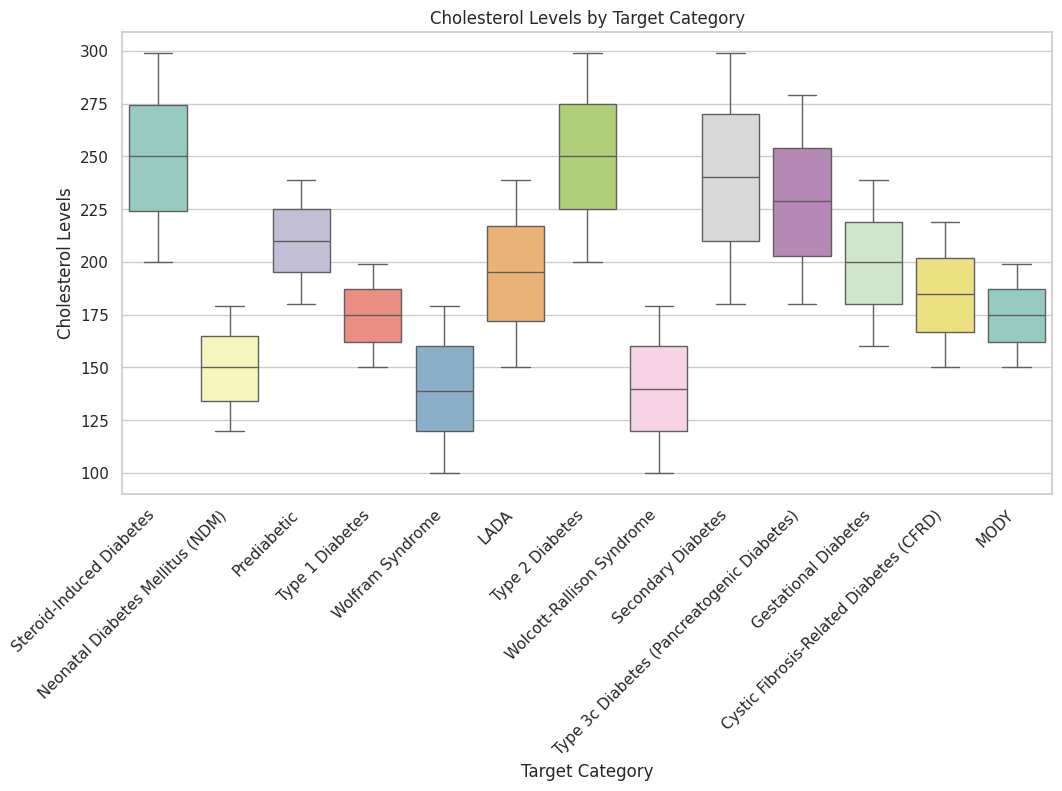

In [112]:
# Box Plot of Cholesterol Levels by Target to visualize distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=DiabetesDataset, x='Target', y='Cholesterol Levels', palette="Set3")
plt.title("Cholesterol Levels by Target Category")
plt.xlabel("Target Category")
plt.ylabel("Cholesterol Levels")
plt.xticks(rotation=45, ha='right')
plt.show()


###Count and Percentage of Target Categories

<ipython-input-113-b3889b976741>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=DiabetesDataset, x='Target', order=DiabetesDataset['Target'].value_counts().index, palette="viridis")


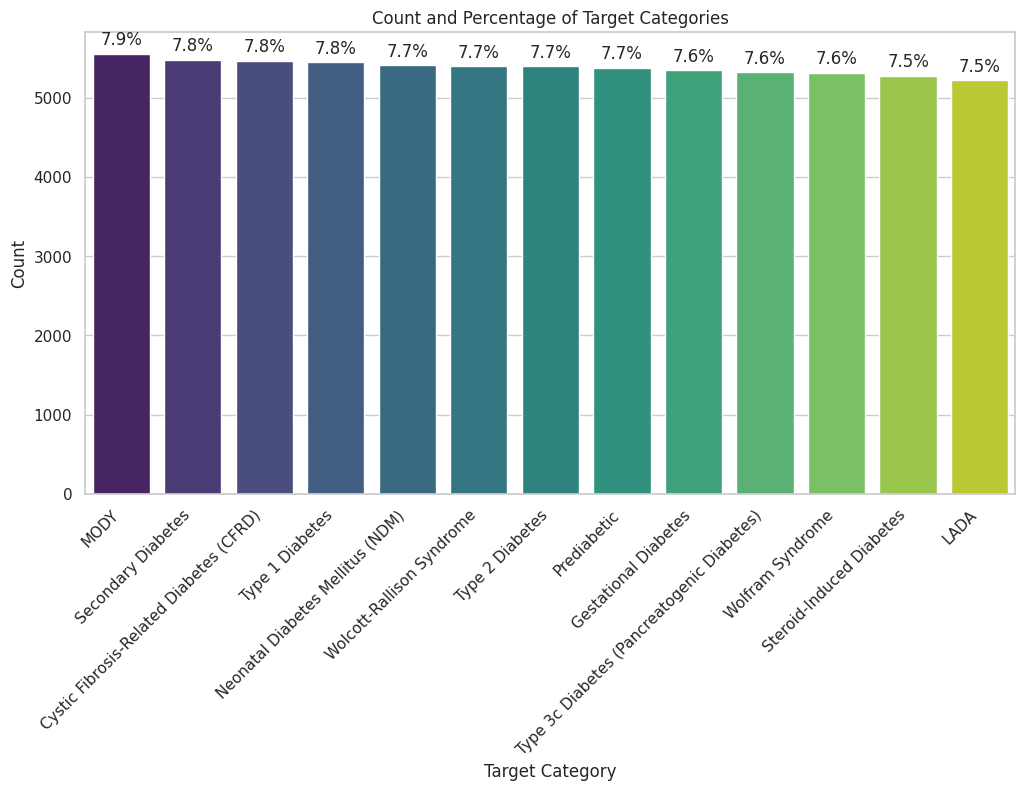

In [113]:
sns.set(style="whitegrid")

# Improved Count Plot of Target Categories with percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=DiabetesDataset, x='Target', order=DiabetesDataset['Target'].value_counts().index, palette="viridis")
plt.title("Count and Percentage of Target Categories")
plt.xlabel("Target Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Calculate percentages and annotate each bar
total = len(DiabetesDataset)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count / total:.1%}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


###Histogram of Age by Target

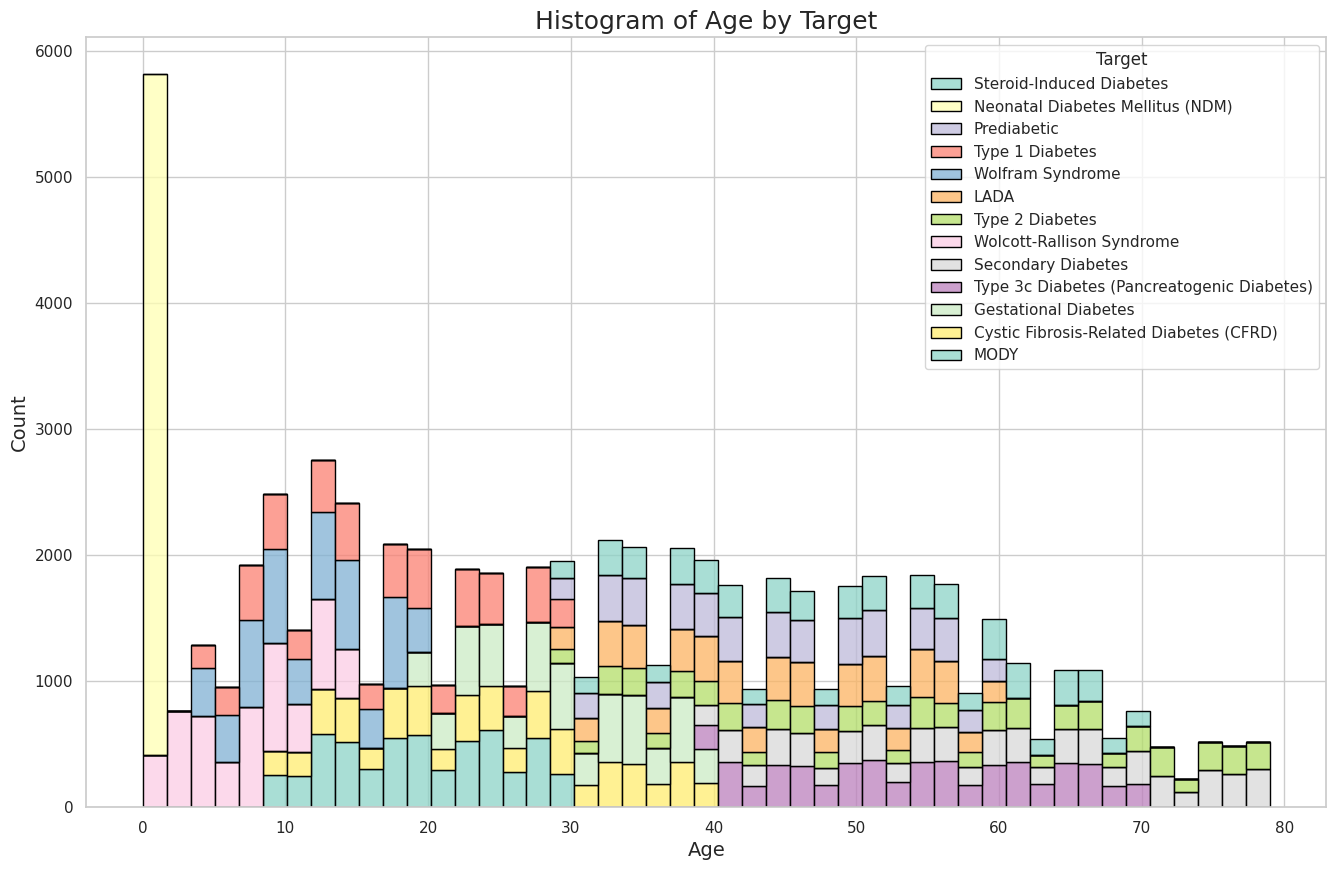

In [114]:
# Set a consistent style for all plots
sns.set(style="whitegrid")

# Increase figure size for better readability
plt.figure(figsize=(16, 10))

# Use a histogram with distinct colors for each target category
sns.histplot(data=DiabetesDataset, x='Age', hue='Target', multiple='stack', palette='Set3', edgecolor='black')

# Set title and labels for clarity
plt.title("Histogram of Age by Target", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()


###Blood Pressure vs Age by Target Category

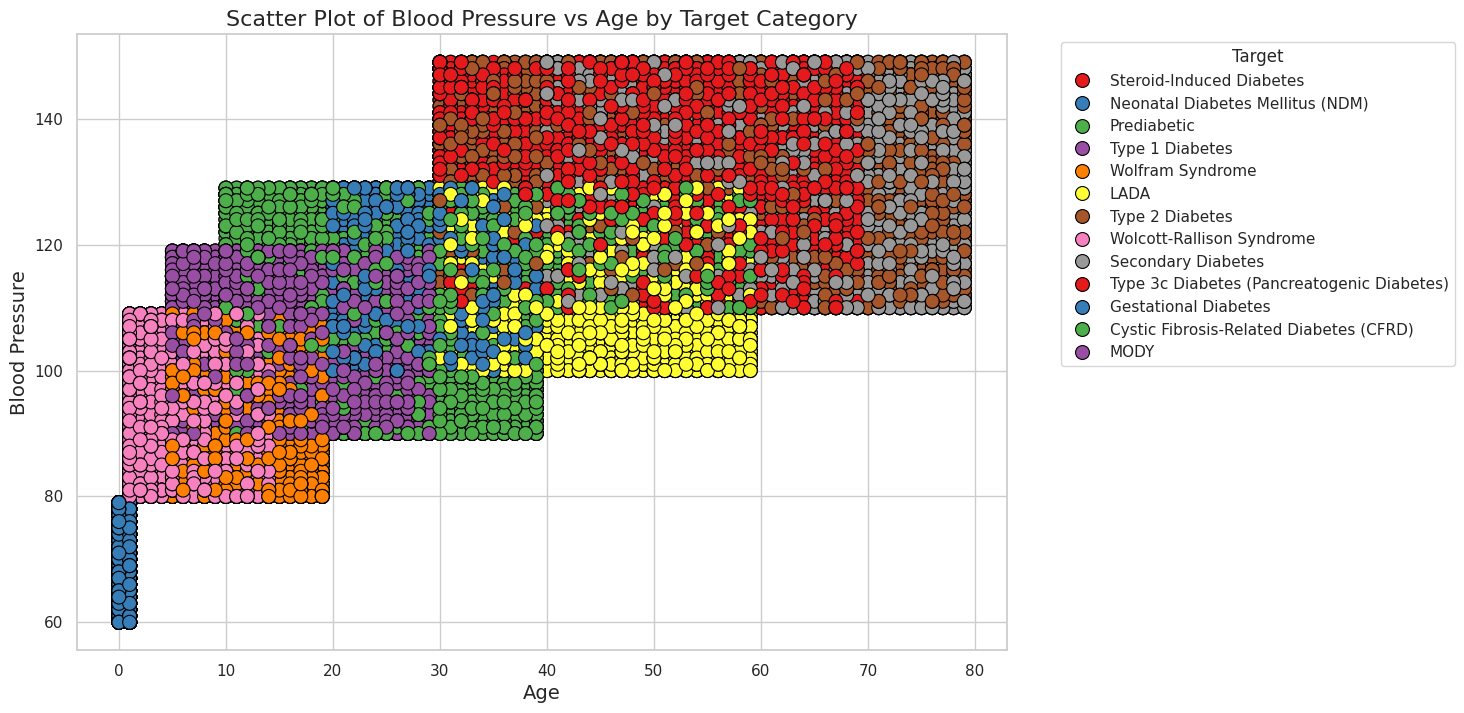

In [115]:
# Set a consistent style for all plots
sns.set(style="whitegrid")

# Increase figure size for better readability
plt.figure(figsize=(12, 8))

# Create scatter plot with 'BMI' on x-axis, 'Glucose Tolerance Test' on y-axis, and color-coded by 'Target'
sns.scatterplot(data=DiabetesDataset, x='Age', y='Blood Pressure', hue='Target', palette='Set1', s=100, edgecolor='black')

# Set title and labels for clarity
plt.title("Scatter Plot of Blood Pressure vs Age by Target Category", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Blood Pressure", fontsize=14)

# Show legend and plot
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [116]:
# Filter dataset for "Gestational Diabetes" cases
gestational_diabetes_data = DiabetesDataset[DiabetesDataset['Target'] == 'Type 2 Diabetes']

# Display summary statistics for the 'Blood Pressure' column
blood_pressure_range = gestational_diabetes_data['Blood Pressure'].describe()
print("Blood Pressure Range for Gestational Diabetes:")
print(blood_pressure_range)

# Optionally, display the minimum and maximum blood pressure values
min_bp = gestational_diabetes_data['Blood Pressure'].min()
max_bp = gestational_diabetes_data['Blood Pressure'].max()
print(f"\nMinimum Blood Pressure: {min_bp}")
print(f"Maximum Blood Pressure: {max_bp}")


Blood Pressure Range for Gestational Diabetes:
count    5397.000000
mean      129.608857
std        11.586537
min       110.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       149.000000
Name: Blood Pressure, dtype: float64

Minimum Blood Pressure: 110
Maximum Blood Pressure: 149


###Cholesterol Levels vs Insulin Levels by Target Category

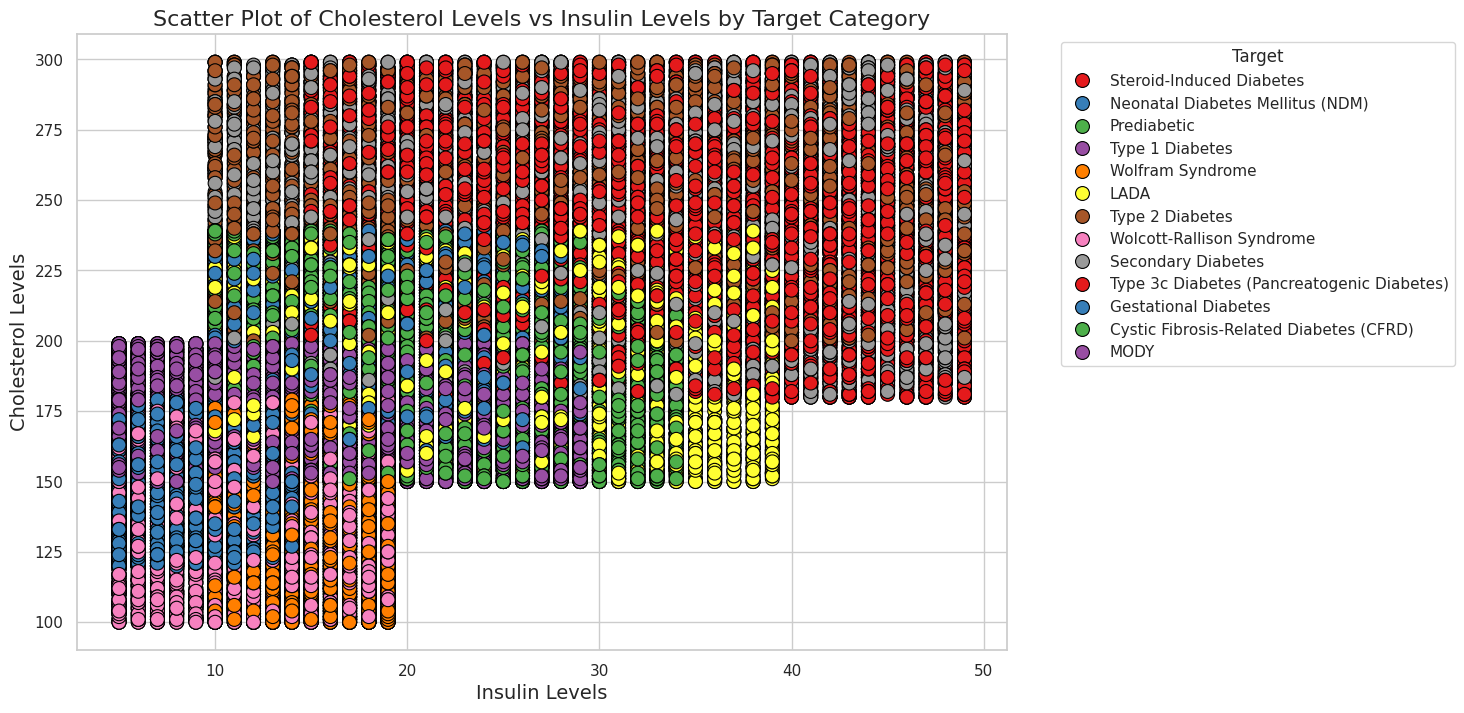

In [117]:
# Set a consistent style for all plots
sns.set(style="whitegrid")

# Increase figure size for readability
plt.figure(figsize=(12, 8))

# Create scatter plot with 'Insulin Levels' on x-axis and 'Blood Pressure' on y-axis, color-coded by 'Target'
sns.scatterplot(data=DiabetesDataset, x='Insulin Levels', y='Cholesterol Levels', hue='Target', palette='Set1', s=100, edgecolor='black')

# Set title and labels for clarity
plt.title("Scatter Plot of Cholesterol Levels vs Insulin Levels by Target Category", fontsize=16)
plt.xlabel("Insulin Levels", fontsize=14)
plt.ylabel("Cholesterol Levels", fontsize=14)

# Show legend and plot
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


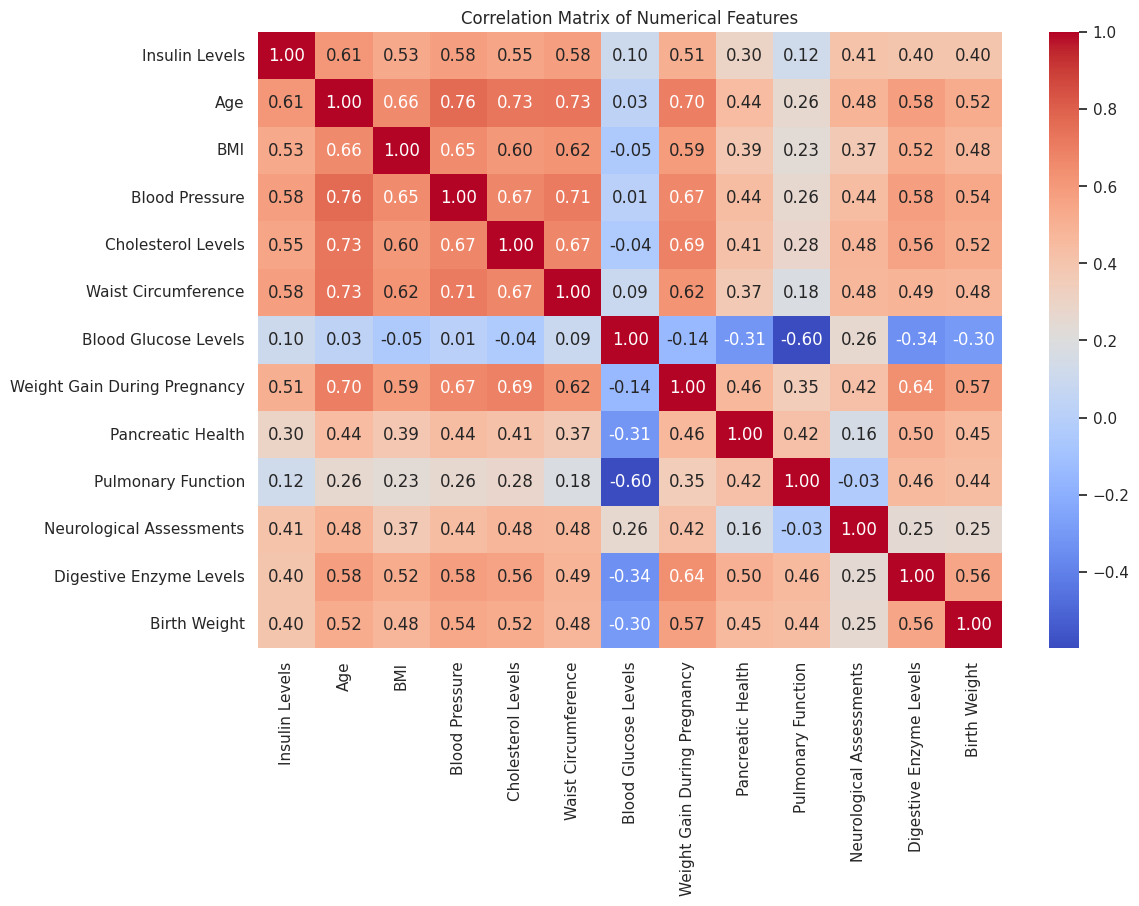

In [118]:
# Visualize correlations among numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = DiabetesDataset[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


##Outliers

###Visualize outliers using box plots for each numerical feature

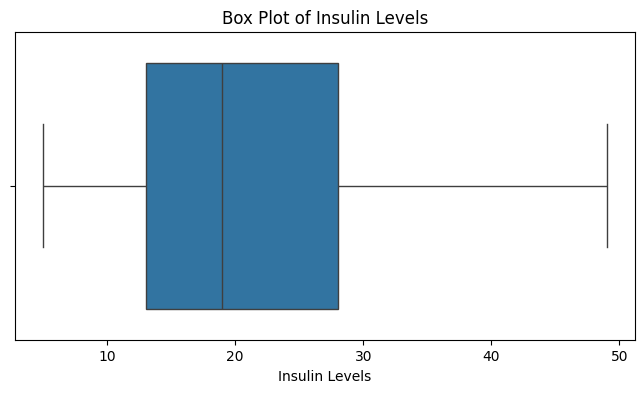

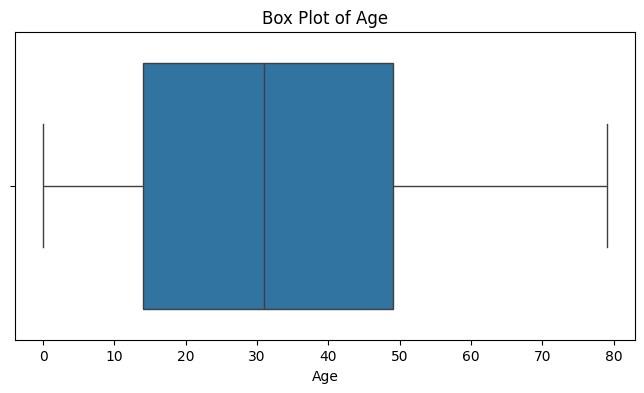

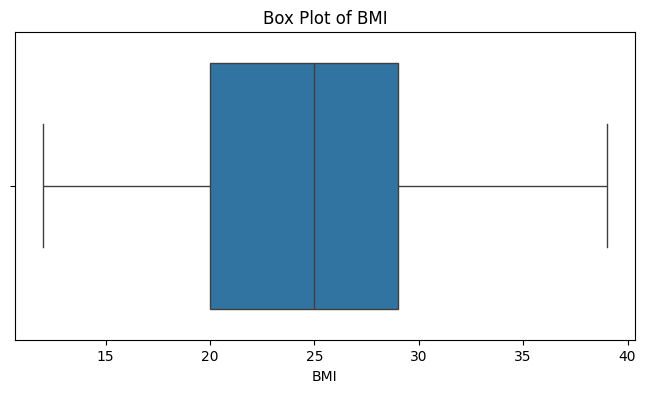

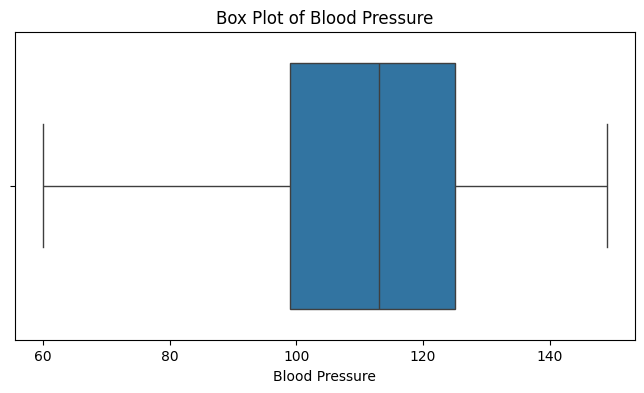

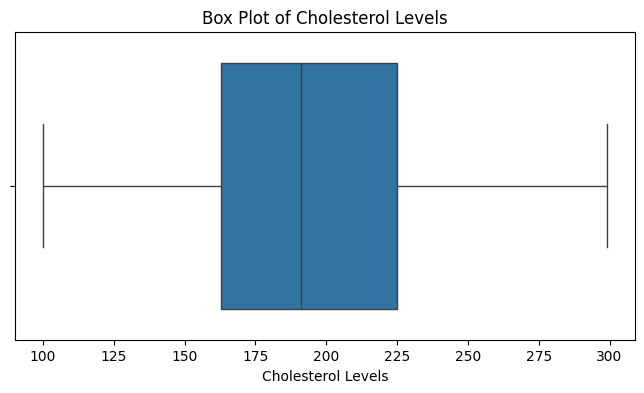

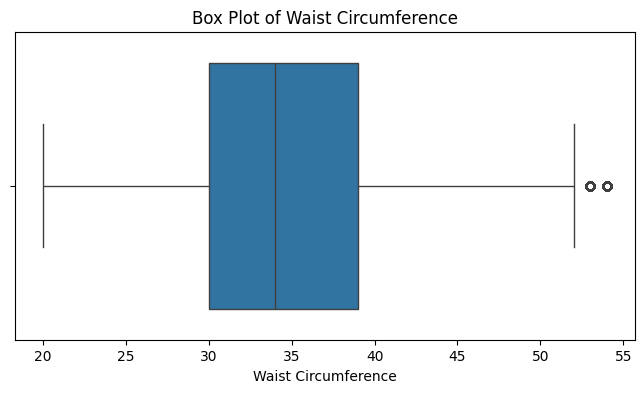

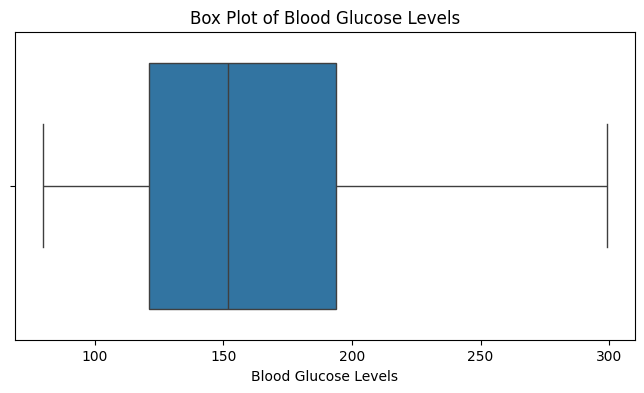

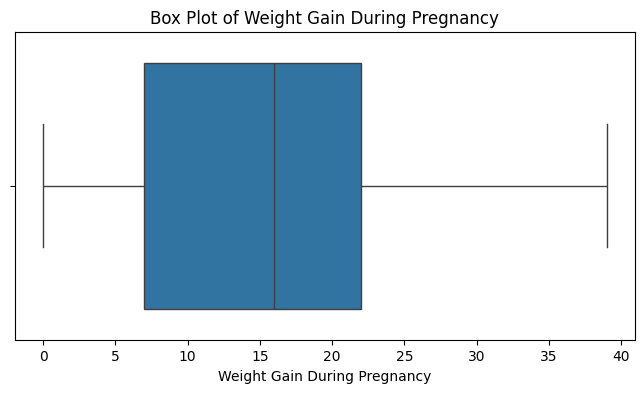

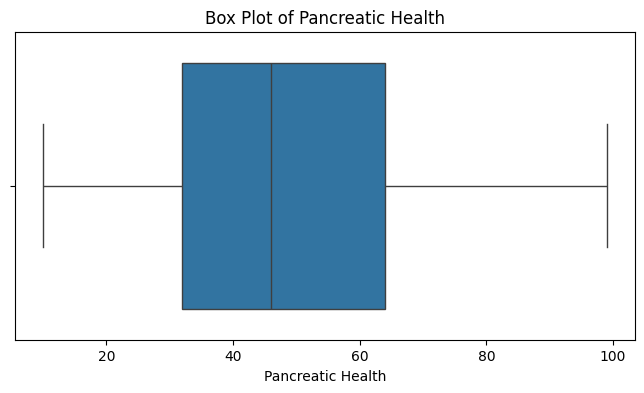

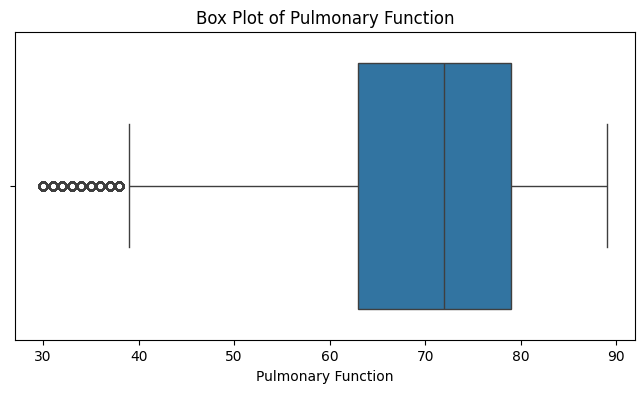

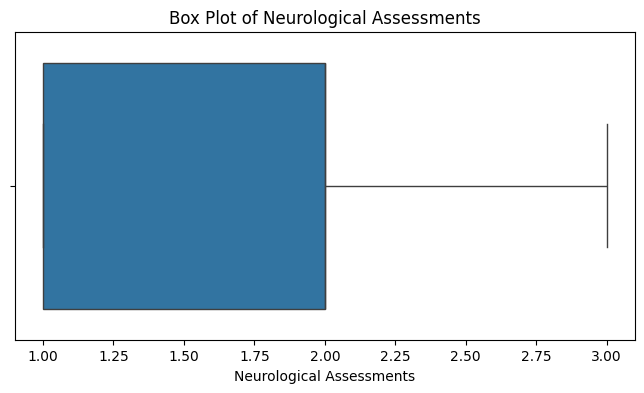

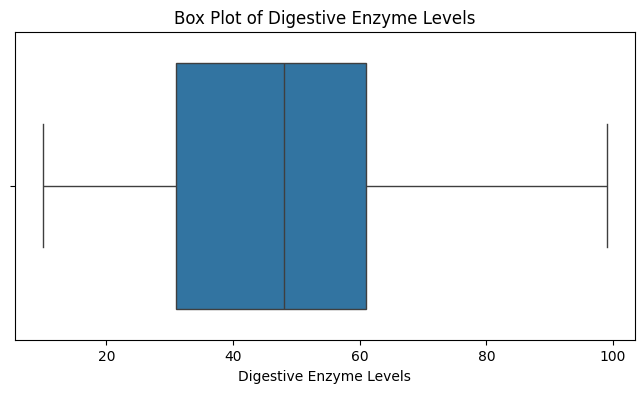

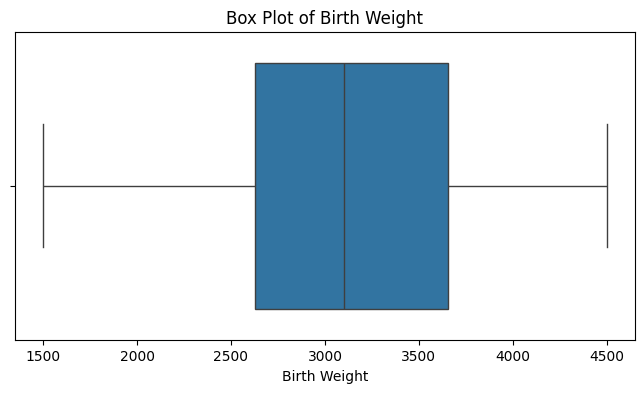

In [76]:
# Visualize outliers using box plots for each numerical feature
numerical_features = DiabetesDataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=DiabetesDataset[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


Number of outliers before handling:
{'Insulin Levels': 0, 'Age': 0, 'BMI': 0, 'Blood Pressure': 0, 'Cholesterol Levels': 0, 'Waist Circumference': 522, 'Blood Glucose Levels': 0, 'Weight Gain During Pregnancy': 0, 'Pancreatic Health': 0, 'Pulmonary Function': 1206, 'Neurological Assessments': 0, 'Digestive Enzyme Levels': 0, 'Birth Weight': 0}

Number of outliers after handling:
{'Insulin Levels': 0, 'Age': 0, 'BMI': 0, 'Blood Pressure': 0, 'Cholesterol Levels': 0, 'Waist Circumference': 0, 'Blood Glucose Levels': 0, 'Weight Gain During Pregnancy': 0, 'Pancreatic Health': 0, 'Pulmonary Function': 0, 'Neurological Assessments': 0, 'Digestive Enzyme Levels': 0, 'Birth Weight': 0}

Summary statistics after handling outliers:
       Insulin Levels           Age           BMI  Blood Pressure  \
count    70000.000000  70000.000000  70000.000000    70000.000000   
mean        21.607443     32.020700     24.782943      111.339543   
std         10.785852     21.043173      6.014236       19.94

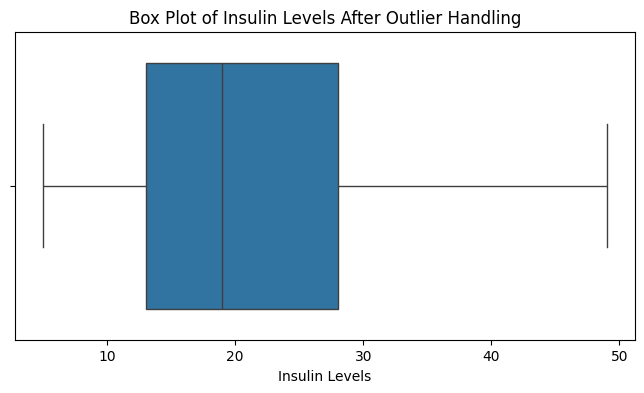

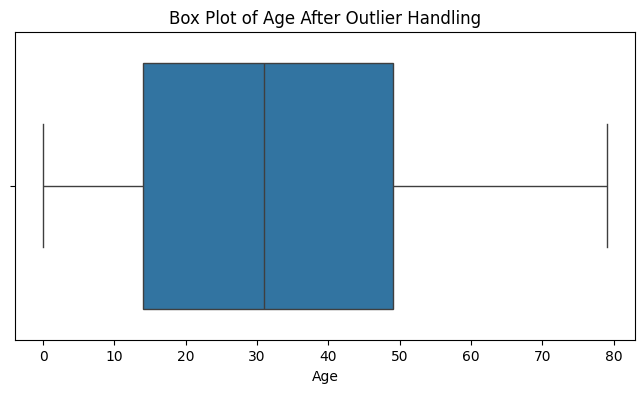

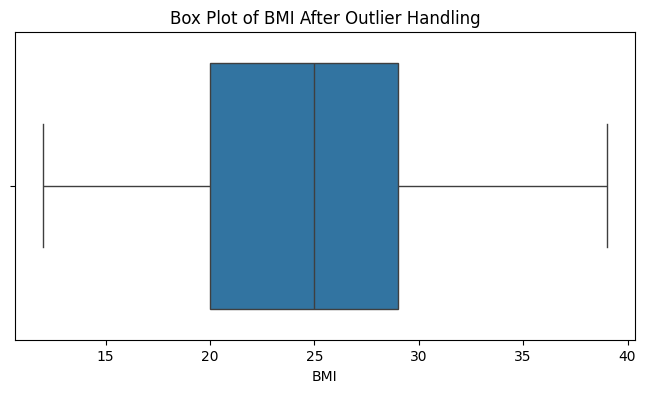

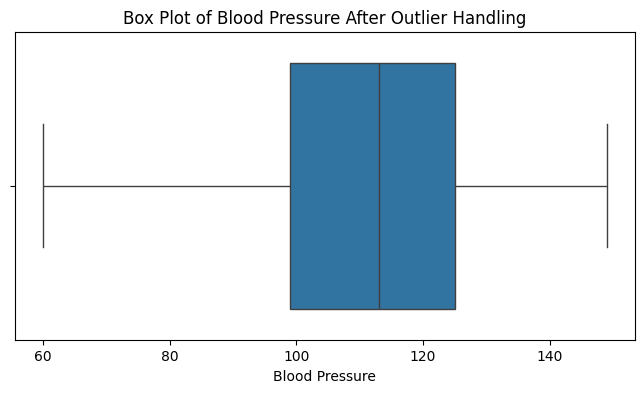

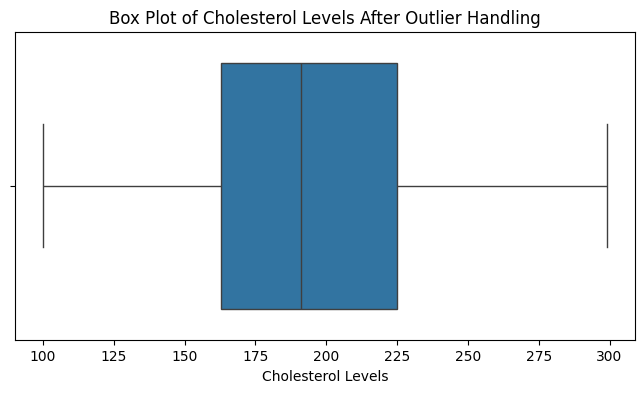

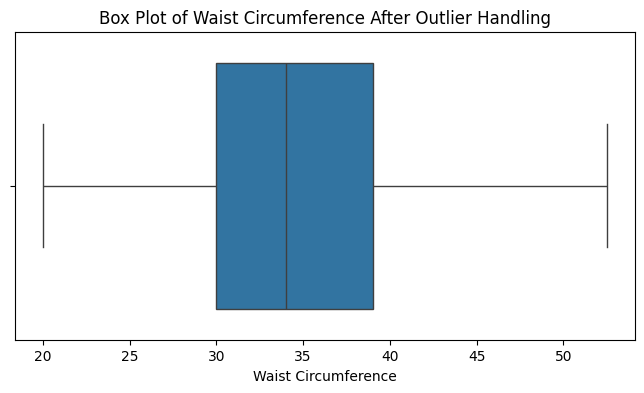

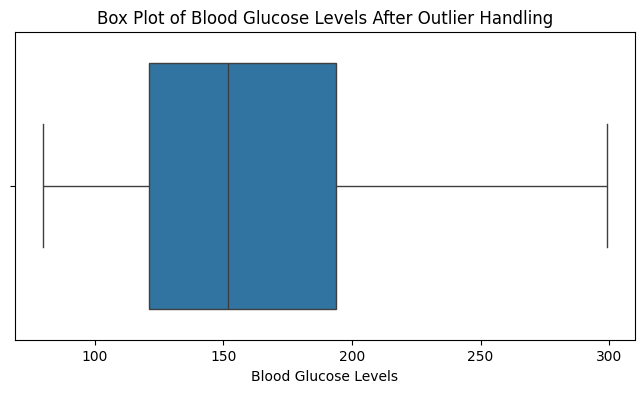

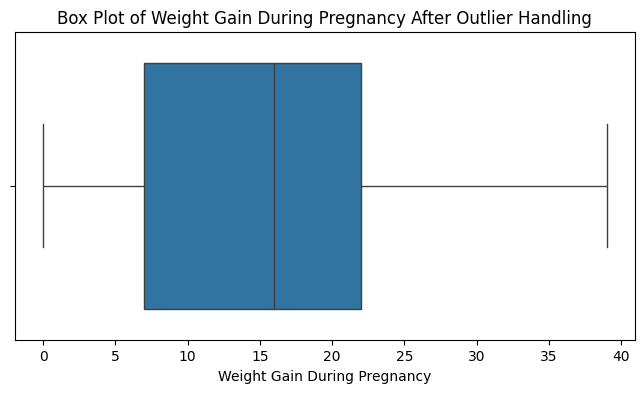

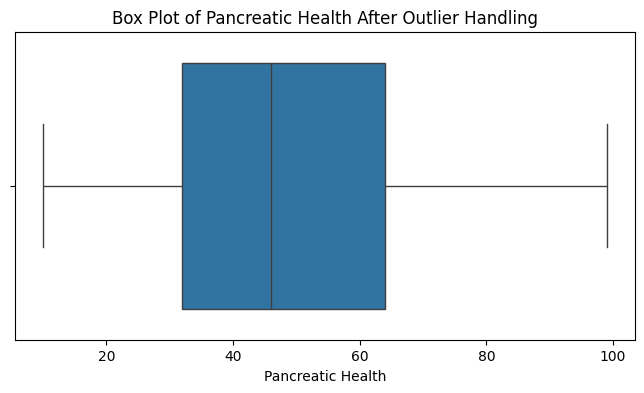

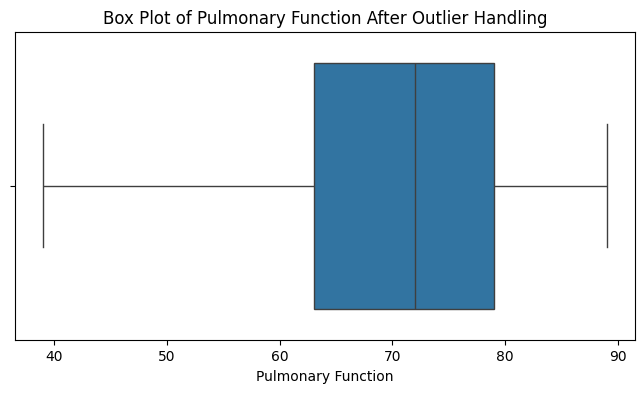

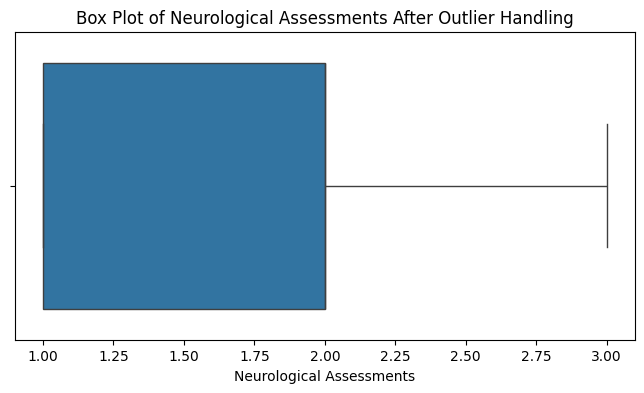

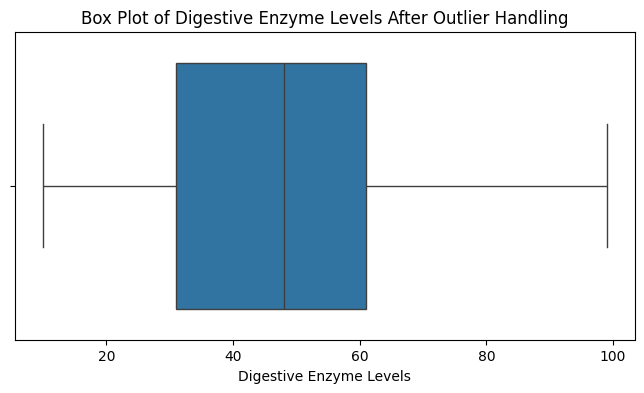

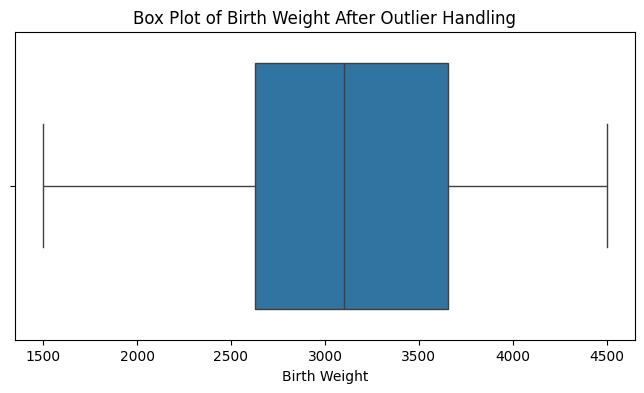

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = DiabetesDataset.select_dtypes(include=['float64', 'int64']).columns

def count_outliers(df):
    outlier_counts = {}
    for col in numerical_features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers outside the bounds
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    return outlier_counts

def handle_outliers(df, method="cap"):
    # Track the number of outliers before handling
    initial_outliers = count_outliers(df)
    print("Number of outliers before handling:")
    print(initial_outliers)

    for col in numerical_features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == "remove":
            # Option 1: Remove rows with outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        elif method == "cap":
            # Option 2: Cap outliers to lower and upper bounds
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Track the number of outliers after handling
    final_outliers = count_outliers(df)
    print("\nNumber of outliers after handling:")
    print(final_outliers)

    return df

# Choose the method to handle outliers: "cap" or "remove"
DiabetesDataset_cleaned = handle_outliers(DiabetesDataset.copy(), method="cap")

# Check the summary statistics after handling outliers
print("\nSummary statistics after handling outliers:")
print(DiabetesDataset_cleaned.describe())

# Plot boxplots to verify outliers are capped/removed
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=DiabetesDataset_cleaned[col])
    plt.title(f"Box Plot of {col} After Outlier Handling")
    plt.show()


In [78]:

print("\nSummary statistics befor handling outliers:")
print(DiabetesDataset.describe())

# Check the summary statistics after handling outliers
print("\nSummary statistics after handling outliers:")
print(DiabetesDataset_cleaned.describe())



Summary statistics befor handling outliers:
       Insulin Levels           Age           BMI  Blood Pressure  \
count    70000.000000  70000.000000  70000.000000    70000.000000   
mean        21.607443     32.020700     24.782943      111.339543   
std         10.785852     21.043173      6.014236       19.945000   
min          5.000000      0.000000     12.000000       60.000000   
25%         13.000000     14.000000     20.000000       99.000000   
50%         19.000000     31.000000     25.000000      113.000000   
75%         28.000000     49.000000     29.000000      125.000000   
max         49.000000     79.000000     39.000000      149.000000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count        70000.000000         70000.000000          70000.000000   
mean           194.867200            35.051657            160.701657   
std             44.532466             6.803461             48.165547   
min            100.000000            20.00000

In [79]:
import pandas as pd

# Function to remove duplicates and print the number of rows before and after
def remove_duplicates(df):
    # Print the number of rows before removing duplicates
    print(f"Number of rows before removing duplicates: {df.shape[0]}")

    # Remove duplicates
    df_cleaned = df.drop_duplicates()

    # Print the number of rows after removing duplicates
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

    return df_cleaned

# Example usage: Remove duplicates from the dataset
DiabetesDataset_cleaned = remove_duplicates(DiabetesDataset.copy())



Number of rows before removing duplicates: 70000
Number of rows after removing duplicates: 70000


#label encoding

In [80]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical(DiabetesDataset):

    label_encoders = {}
    for col in DiabetesDataset.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        DiabetesDataset[col] = le.fit_transform(DiabetesDataset[col])
        label_encoders[col] = le  # Save the label encoder for potential reverse mapping

    return DiabetesDataset, label_encoders

# Apply label encoding to the dataset
diabetes_dataset_encoded, encoders = label_encode_categorical(DiabetesDataset.copy())
diabetes_dataset_encoded.head()



,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,1,0,0,1,40,44,38,0,0,...,76,0,0,1,3,1,56,1,2629,0
1,4,1,0,0,1,13,1,17,0,0,...,60,1,0,0,1,1,28,0,1881,1
2,5,1,1,1,1,27,36,24,0,1,...,80,1,0,0,1,0,55,1,3622,1
3,8,0,1,0,1,8,7,16,1,1,...,89,1,0,1,2,0,60,1,3542,0
4,12,0,0,1,1,17,10,17,0,0,...,41,0,0,1,1,1,24,3,1770,0


##label encoding mapping

In [81]:
# Function to print label encoding mapping
def print_label_encodings(encoders):
    for col, le in encoders.items():
        print(f"\nColumn: {col}")
        for label, value in zip(le.classes_, range(len(le.classes_))):
            print(f"  {label} -> {value}")

# Print label encoding mappings
print_label_encodings(encoders)



Column: Target
  Cystic Fibrosis-Related Diabetes (CFRD) -> 0
  Gestational Diabetes -> 1
  LADA -> 2
  MODY -> 3
  Neonatal Diabetes Mellitus (NDM) -> 4
  Prediabetic -> 5
  Secondary Diabetes -> 6
  Steroid-Induced Diabetes -> 7
  Type 1 Diabetes -> 8
  Type 2 Diabetes -> 9
  Type 3c Diabetes (Pancreatogenic Diabetes) -> 10
  Wolcott-Rallison Syndrome -> 11
  Wolfram Syndrome -> 12

Column: Genetic Markers
  Negative -> 0
  Positive -> 1

Column: Autoantibodies
  Negative -> 0
  Positive -> 1

Column: Family History
  No -> 0
  Yes -> 1

Column: Environmental Factors
  Absent -> 0
  Present -> 1

Column: Physical Activity
  High -> 0
  Low -> 1
  Moderate -> 2

Column: Dietary Habits
  Healthy -> 0
  Unhealthy -> 1

Column: Ethnicity
  High Risk -> 0
  Low Risk -> 1

Column: Socioeconomic Factors
  High -> 0
  Low -> 1
  Medium -> 2

Column: Smoking Status
  Non-Smoker -> 0
  Smoker -> 1

Column: Alcohol Consumption
  High -> 0
  Low -> 1
  Moderate -> 2

Column: Glucose Tolerance T

##Normalization

In [82]:
# Identify numerical columns in the encoded DataFrame
numerical_columns = diabetes_dataset_encoded.select_dtypes(include=['float64', 'int64']).columns

# Print the list of numerical column names
print("Numerical columns:", numerical_columns.tolist())


Numerical columns: ['Target', 'Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Insulin Levels', 'Age', 'BMI', 'Physical Activity', 'Dietary Habits', 'Blood Pressure', 'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Weight Gain During Pregnancy', 'Pancreatic Health', 'Pulmonary Function', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Neurological Assessments', 'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test', 'Birth Weight', 'Early Onset Symptoms']


In [83]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()
numeric =['Genetic Markers', 'Autoantibodies', 'Family History',
          'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
          'Physical Activity', 'Dietary Habits', 'Blood Pressure',
          'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
          'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption',
          'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes',
          'Pregnancy History', 'Weight Gain During Pregnancy', 'Pancreatic Health', 'Pulmonary Function',
          'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
          'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test', 'Birth Weight', 'Early Onset Symptoms']

# Normalize using Min-Max scaling and create a new dataset
df_Normalized_Enco = diabetes_dataset_encoded.copy()  # Copy the original dataset
df_Normalized_Enco[numeric] = min_max_scaler.fit_transform(df_Normalized_Enco[numeric])
# Display the first few rows of the new dataset
df_Normalized_Enco.head()


,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,1.0,0.0,0.0,1.0,0.795455,0.556962,0.962963,0.0,0.0,...,0.779661,0.0,0.0,1.0,1.0,1.0,0.516854,0.333333,0.376459,0.0
1,4,1.0,0.0,0.0,1.0,0.181818,0.012658,0.185185,0.0,0.0,...,0.508475,1.0,0.0,0.0,0.0,1.0,0.202247,0.000000,0.127042,1.0
2,5,1.0,1.0,1.0,1.0,0.500000,0.455696,0.444444,0.0,1.0,...,0.847458,1.0,0.0,0.0,0.0,0.0,0.505618,0.333333,0.707569,1.0
3,8,0.0,1.0,0.0,1.0,0.068182,0.088608,0.148148,0.5,1.0,...,1.000000,1.0,0.0,1.0,0.5,0.0,0.561798,0.333333,0.680894,0.0
4,12,0.0,0.0,1.0,1.0,0.272727,0.126582,0.185185,0.0,0.0,...,0.186441,0.0,0.0,1.0,0.0,1.0,0.157303,1.000000,0.090030,0.0


##Analyzing the relevance of each feature for the machine learning task.

###Feature Selection

In [84]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume df_Processed is your scaled DataFrame
numerical_columns = ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
                     'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy',
                     'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments',
                     'Digestive Enzyme Levels', 'Birth Weight']

threshold = 0.045  # Define a variance threshold (tune this value as needed)
selector = VarianceThreshold(threshold=threshold)

# Fit and transform the scaled numerical data
df_high_variance = selector.fit_transform(df_Normalized_Enco[numerical_columns])

# Get the selected features
selected_features = [column for column, support in zip(numerical_columns, selector.get_support()) if support]

# Convert the selected data back to a DataFrame
df_Features_selected = pd.DataFrame(df_high_variance, columns=selected_features)

# Step 3: Combine with the target or other features (if necessary)
df_final = pd.concat([df_Features_selected, df_Normalized_Enco.drop(columns=numerical_columns)], axis=1)

# Print results
print(f"Original features: {len(numerical_columns)}")
print(f"Selected features after variance thresholding: {len(selected_features)}")
print(f"Selected features: {selected_features}")



Original features: 13
Selected features after variance thresholding: 11
Selected features: ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels', 'Weight Gain During Pregnancy', 'Pancreatic Health', 'Neurological Assessments', 'Digestive Enzyme Levels', 'Birth Weight']


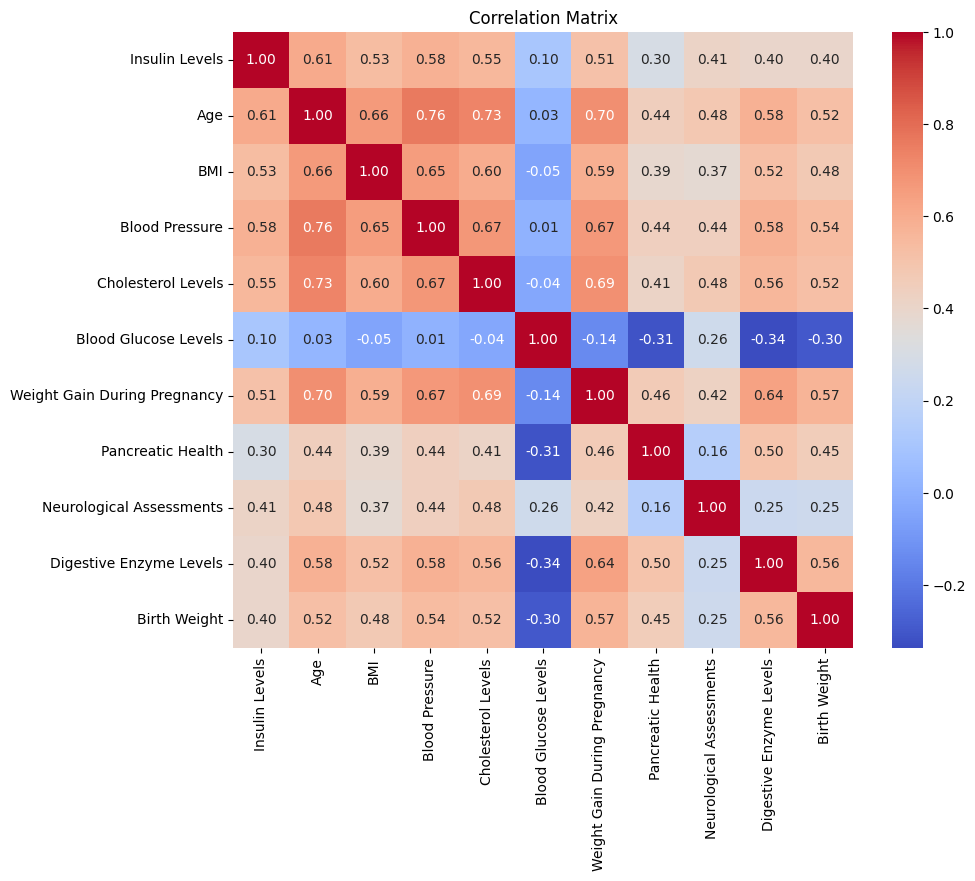

In [85]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df_Features_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


##Use dimensionality reduction techniques to reduce data dimensionality while retaining important information.

In [86]:

# Importing necessary libraries
from sklearn.decomposition import PCA
import pandas as pd


# Apply PCA with 90% explained variance
pca = PCA(n_components=0.9)
principal_components = pca.fit_transform(df_Normalized_Enco)

# Convert the result back to a dataframe
pca_df = pd.DataFrame(principal_components)

# Optionally, you can add the target column back to the dataset if you have one
pca_df['Target'] = diabetes_dataset_encoded['Target']

# Check the shape of the resulting dataframe
print(f"Number of components chosen: {pca.n_components_}")
print(pca_df.head())


Number of components chosen: 15
          0         1         2         3         4         5         6  \
0  1.021495  0.730695 -0.152331  0.118036 -0.201292 -0.452691  0.943175   
1 -1.968857 -1.085083 -0.774492  0.587229 -0.428502 -0.466880  0.181617   
2 -1.017028  0.013799  0.241970  0.201676  0.548522 -0.233959 -0.240635   
3  1.988523 -0.286208  0.993166  0.021168 -0.218573  0.642492  0.322527   
4  6.051279 -0.818073 -0.114246 -0.219837 -0.123664  0.031128  0.638007   

          7         8         9        10        11        12        13  \
0 -0.021632  0.034442  0.690319  0.035379 -1.013816 -0.561284 -0.817214   
1  0.240624 -0.982098  0.426789 -0.066269 -0.381329 -0.084646 -0.384535   
2  0.577811 -0.814503 -0.072433  0.310728  0.790329  0.095124 -0.394545   
3 -0.681352 -0.295570 -0.127237  0.481135  0.084855 -0.318424  0.107204   
4 -0.551963  0.679596  0.730095  0.408924 -0.259401 -1.231131 -0.012954   

         14  Target  
0  0.201591       7  
1  0.027472       4  


#• Model Evaluation:


##Split the dataset into traning and testing sets

In [93]:
from sklearn.model_selection import train_test_split

# Raw data (DiabetesDataset)
X_raw = df_Normalized_Enco.drop(columns=['Target'])  # Features
y_raw = df_Normalized_Enco['Target']  # Target variable

# Processed data (df_PreProcessed)
X_preprocessed = pca_df.drop(columns=['Target'])  # Features
y_preprocessed = pca_df['Target']  # Target variable

# Split raw data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.25, random_state=42
)

# Split processed data
X_train_preprocessed, X_test_preprocessed, y_train_preprocessed, y_test_preprocessed = train_test_split(
    X_preprocessed, y_preprocessed, test_size=0.25, random_state=42
)


##Train on Raw Data(before applying feature selection and scaling)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train Random Forest on raw data
rf_raw = RandomForestClassifier(random_state=42)
rf_raw.fit(X_train_raw, y_train_raw)

# Predict and evaluate
y_pred_raw = rf_raw.predict(X_test_raw)

# Performance metrics for raw data
print("Performance on Raw Data:")
print(f"Accuracy: {accuracy_score(y_test_raw, y_pred_raw):.4f}")
print(f"Precision: {precision_score(y_test_raw, y_pred_raw, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_raw, y_pred_raw, average='weighted'):.4f}")


Performance on Raw Data:
Accuracy: 0.9009
Precision: 0.9058
Recall: 0.9009


##Train on preprocsessed Data

In [73]:
# Train the Random Forest model on the processed data
rf_preprocessed = RandomForestClassifier(random_state=42)
rf_preprocessed.fit(X_train_preprocessed, y_train_preprocessed)

# Predict and evaluate the model
y_pred_preprocessed = rf_preprocessed.predict(X_test_preprocessed)

# Performance metrics for the processed data
print("Performance on Processed Data:")
print(f"Accuracy: {accuracy_score(y_test_preprocessed, y_pred_preprocessed):.4f}")
print(f"Precision: {precision_score(y_test_preprocessed, y_pred_preprocessed, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_preprocessed, y_pred_preprocessed, average='weighted'):.4f}")


Performance on Processed Data:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999


#Part2


##Train on the preprocessed data

###import the neaded libraries and split the dataset into training and testing

In [88]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Use the PCA-preprocessed data
X_preprocessed = pca_df.drop(columns=['Target'])  # Features
y_preprocessed = pca_df['Target']  # Target variable

# Split the data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.25, random_state=42)



###Random Forest Model

In [89]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train and evaluate Random Forest
def train_and_evaluate_rf(X_train, X_test, y_train, y_test):
    # Track start time
    start_time = time.time()

    # Train the model
    rf.fit(X_train, y_train)

    # Predict on test data
    y_pred = rf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Track end time
    end_time = time.time()
    training_time = end_time - start_time

    return accuracy, precision, recall, f1, training_time

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_training_time = train_and_evaluate_rf(X_train, X_test, y_train, y_test)

# Display Random Forest results
print(f"Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}, Training Time: {rf_training_time:.4f} seconds\n")


Random Forest Performance:
Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9999, F1-Score: 0.9999, Training Time: 52.9377 seconds



###Support Vector Machine (SVM) Model

In [90]:
# Support Vector Machine (SVM) Classifier
from sklearn.svm import SVC

# Initialize SVM model
svm = SVC(random_state=42)

# Train and evaluate SVM
def train_and_evaluate_svm(X_train, X_test, y_train, y_test):
    # Track start time
    start_time = time.time()

    # Train the model
    svm.fit(X_train, y_train)

    # Predict on test data
    y_pred = svm.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Track end time
    end_time = time.time()
    training_time = end_time - start_time

    return accuracy, precision, recall, f1, training_time

# Evaluate SVM
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_training_time = train_and_evaluate_svm(X_train, X_test, y_train, y_test)

# Display SVM results
print(f"SVM Performance:")
print(f"Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1-Score: {svm_f1:.4f}, Training Time: {svm_training_time:.4f} seconds\n")


SVM Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, Training Time: 12.7542 seconds



###Multilayer Perceptron (MLP) Model

In [96]:
# Multilayer Perceptron (MLP) Classifier
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train and evaluate MLP
def train_and_evaluate_mlp(X_train, X_test, y_train, y_test):
    # Track start time
    start_time = time.time()

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict on test data
    y_pred = mlp.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Track end time
    end_time = time.time()
    training_time = end_time - start_time

    return accuracy, precision, recall, f1, training_time

# Evaluate MLP
mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_training_time = train_and_evaluate_mlp(X_train, X_test, y_train, y_test)

# Display MLP results
print(f"MLP Performance:")
print(f"Accuracy: {mlp_accuracy:.4f}, Precision: {mlp_precision:.4f}, Recall: {mlp_recall:.4f}, F1-Score: {mlp_f1:.4f}, Training Time: {mlp_training_time:.4f} seconds\n")


MLP Performance:
Accuracy: 0.8282, Precision: 0.8285, Recall: 0.8282, F1-Score: 0.8272, Training Time: 320.6913 seconds



###print all results

In [92]:
# Display all the results in one place for comparison
print("Comparison of Classification Models:")
print(f"Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}, Training Time: {rf_training_time:.4f} seconds\n")

print(f"SVM Performance:")
print(f"Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1-Score: {svm_f1:.4f}, Training Time: {svm_training_time:.4f} seconds\n")

print(f"MLP Performance:")
print(f"Accuracy: {mlp_accuracy:.4f}, Precision: {mlp_precision:.4f}, Recall: {mlp_recall:.4f}, F1-Score: {mlp_f1:.4f}, Training Time: {mlp_training_time:.4f} seconds\n")


Comparison of Classification Models:
Random Forest Performance:
Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9999, F1-Score: 0.9999, Training Time: 52.9377 seconds

SVM Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, Training Time: 12.7542 seconds

MLP Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, Training Time: 19.7886 seconds



##Train on raw data to show the Effect of Preprocessing:

In [95]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Split the dataset (using preprocessed data from Part 1)
X_raw = df_Normalized_Enco.drop(columns=['Target'])  # Features
y_raw = df_Normalized_Enco['Target']  # Target variable


# Split the data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.25, random_state=42)

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Track start time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Track end time
    end_time = time.time()
    training_time = end_time - start_time

    return accuracy, precision, recall, f1, training_time

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_training_time = train_and_evaluate_model(rf, X_train, X_test, y_train, y_test)

# Evaluate SVM
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_training_time = train_and_evaluate_model(svm, X_train, X_test, y_train, y_test)

# Evaluate MLP
mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_training_time = train_and_evaluate_model(mlp, X_train, X_test, y_train, y_test)

# Display the results
print(f"Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}, Training Time: {rf_training_time:.4f} seconds\n")

print(f"SVM Performance:")
print(f"Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1-Score: {svm_f1:.4f}, Training Time: {svm_training_time:.4f} seconds\n")

print(f"MLP Performance:")
print(f"Accuracy: {mlp_accuracy:.4f}, Precision: {mlp_precision:.4f}, Recall: {mlp_recall:.4f}, F1-Score: {mlp_f1:.4f}, Training Time: {mlp_training_time:.4f} seconds\n")


Random Forest Performance:
Accuracy: 0.9009, Precision: 0.9058, Recall: 0.9009, F1-Score: 0.8998, Training Time: 16.5473 seconds

SVM Performance:
Accuracy: 0.7518, Precision: 0.7522, Recall: 0.7518, F1-Score: 0.7517, Training Time: 142.6219 seconds

MLP Performance:
Accuracy: 0.8282, Precision: 0.8285, Recall: 0.8282, F1-Score: 0.8272, Training Time: 237.0337 seconds



##Effect of Model Parameters:
Investigate how parameters affect model performance. Try different combinations of parameters.

In [99]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Use the PCA-preprocessed data
X_preprocessed = pca_df.drop(columns=['Target'])  # Features
y_preprocessed = pca_df['Target']  # Target variable

# Split the data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.25, random_state=42)



###Random Forest (RF) Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2,10],
    'min_samples_leaf': [1, 2],
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
rf_best_score = rf_grid_search.best_score_
print(f"Best Cross-Validation Accuracy: {rf_best_score:.4f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9998


###Support Vector Machine (SVM) Tuning



In [105]:
# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10]
}

# Initialize SVM
svm = SVC(random_state=42)

# GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for SVM:", svm_grid_search.best_params_)
svm_best_model = svm_grid_search.best_estimator_
svm_best_score = svm_grid_search.best_score_
print(f"Best Cross-Validation Accuracy: {svm_best_score:.4f}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for SVM: {'C': 0.1}
Best Cross-Validation Accuracy: 1.0000


###Multilayer Perceptron (MLP) Tuning


In [106]:
# Define parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01],

}

# Initialize MLP
mlp = MLPClassifier(random_state=42)

# GridSearchCV for MLP
mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for MLP:", mlp_grid_search.best_params_)
mlp_best_model = mlp_grid_search.best_estimator_
mlp_best_score = mlp_grid_search.best_score_
print(f"Best Cross-Validation Accuracy: {mlp_best_score:.4f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for MLP: {'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001}
Best Cross-Validation Accuracy: 1.0000
